In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\WIN10\Downloads\concrete.csv',sep=',')
df.columns = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
print(df.keys())

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [9]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


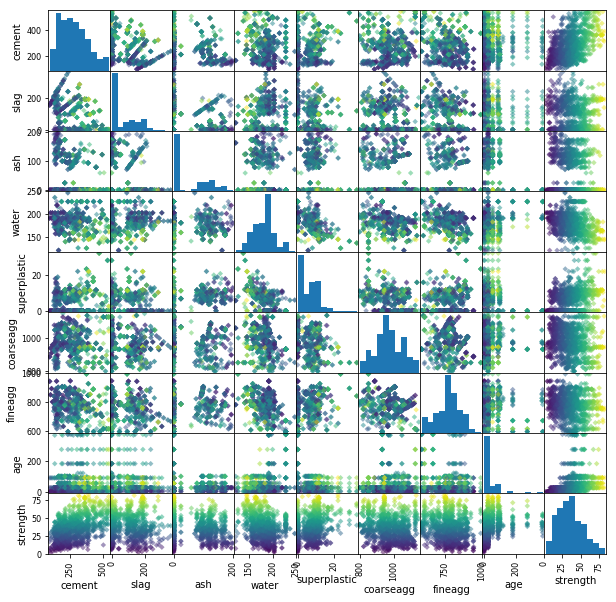

In [10]:
#EDA
data=df[['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg',
      'fineagg', 'age']] 
target=df['strength']
X=data.values
y=target.values
#Visual EDA
_=pd.plotting.scatter_matrix(df,c=y,figsize=[10,10],s=15,marker='D')

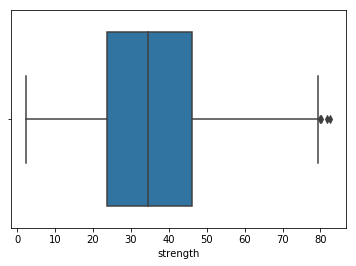

In [11]:
sns.boxplot(df['strength'])

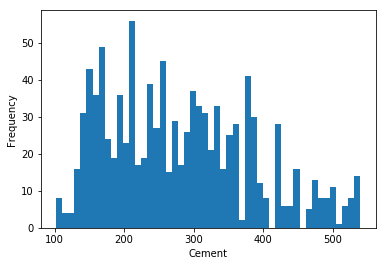

In [12]:
plt.clf() #clears the plot area
df['cement'].plot.hist(bins=50)
plt.xlabel('Cement')
plt.show()

In [13]:
#数据处理，为null时一般用dropna，但是这里为零，假设为零需要消去
#是事实上可能并不需要，再咨询相关专家后，得知这里为零并非异常，因而在后续处理时仍使用全部数据
df_m=df[(df != 0).all(1)]
df_m

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99
10,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35
14,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89
15,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97
23,132.0,207.0,161.0,179.0,5.0,867.0,736.0,28,33.30
29,255.0,99.0,77.0,189.0,6.0,919.0,749.0,28,33.80
35,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,28,39.16
37,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,14,47.71
39,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28,41.41


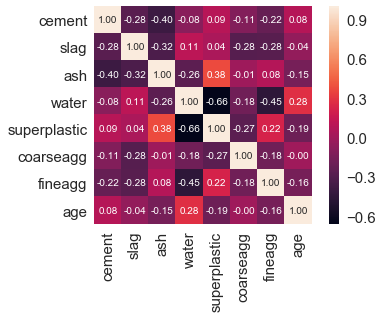

In [14]:
# heatmap
cols=['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg',
      'fineagg', 'age']
cm=np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':10},
               yticklabels=cols,
               xticklabels=cols)
plt.show()

#Part 2
#Fit a linear model using SKlearn to all of the features of the dataset.  
#Describe the model (coefficients and y intercept), 
#plot the residual errors, 
#calculate performance metrics: MSE and R2.  

In [15]:
#标准化！！！！！
#from sklearn.preprocessing import normalize
#sc_x=StandardScaler()
#sc_y=StandardScaler()
#X=sc_x.fit_transform(X)
#y=sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [16]:
#Train/test split
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()

slr.fit(X,y) # all data
y_pred=slr.predict(X) # all data predict

np.set_printoptions(precision=3) #保留三位小数
print('Slope, whole set:',slr.coef_)
print('Intercept, whole set:%.3f'%slr.intercept_)

slr.fit(X_train,y_train) # training set
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('Slope, training set:',slr.coef_)
print('Intercept, training set:%.3f'%slr.intercept_)

Slope, whole set: [ 0.12   0.104  0.088 -0.15   0.292  0.018  0.02   0.114]
Intercept, whole set:-23.331
Slope, training set: [ 0.123  0.106  0.093 -0.14   0.286  0.02   0.023  0.116]
Intercept, training set:-30.959


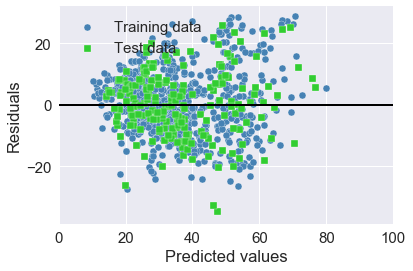

In [18]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=100, color='black', lw=2)
plt.xlim([0, 100])
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

MSE train: 106.025, test: 112.134
R^2 train: 0.617, test: 0.608


In [20]:
#Part 3.1: Ridge regression
#Fit a Ridge model using SKlearn to all of the features of the dataset.  
#Test several settings for alpha.  Describe the model (coefficients and y intercept), 
#plot the residual errors, calculate performance metrics: MSE and R2.  
#Which alpha gives the best performing model?

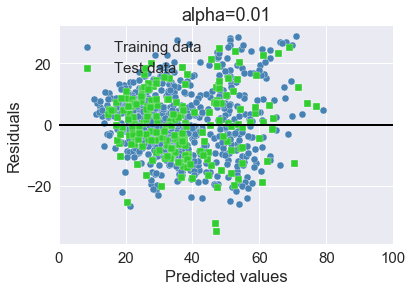

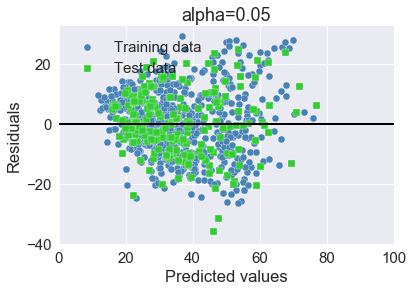

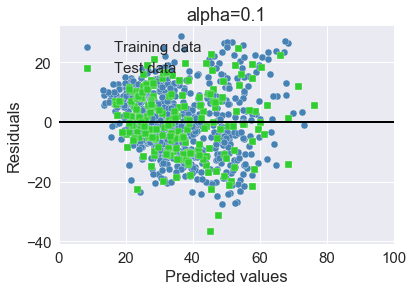

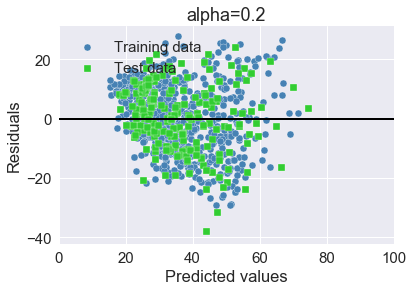

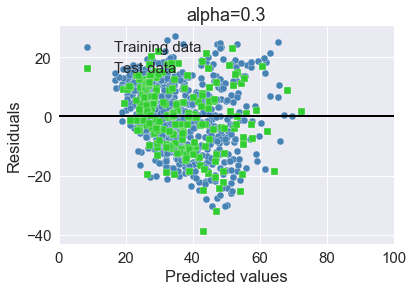

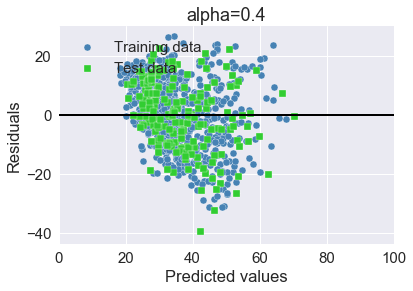

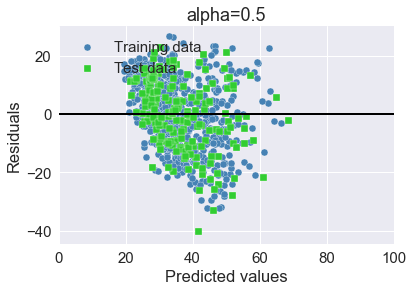

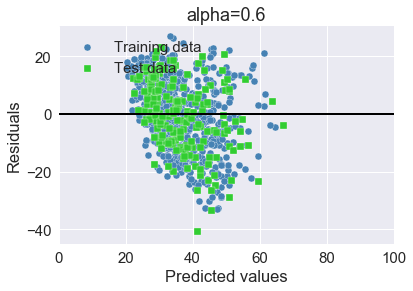

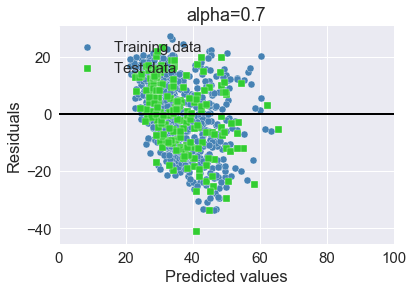

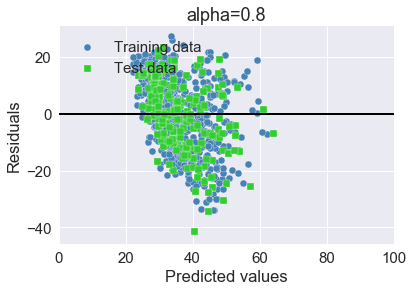

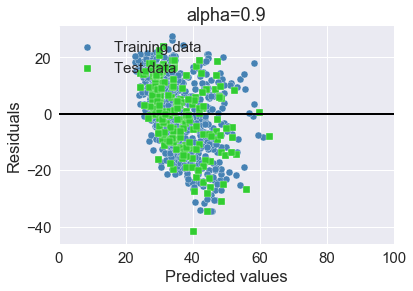

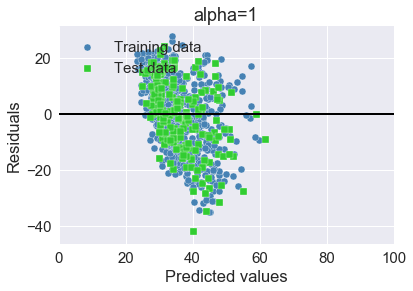

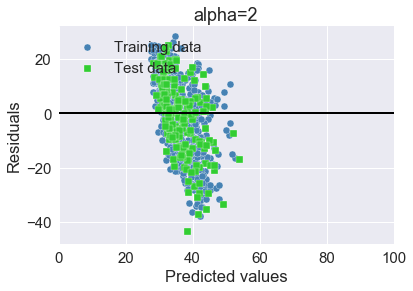

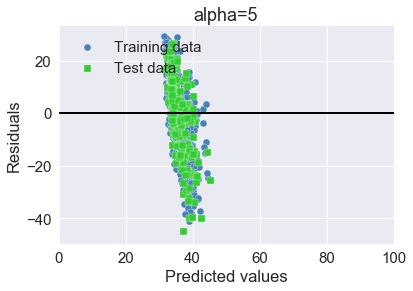

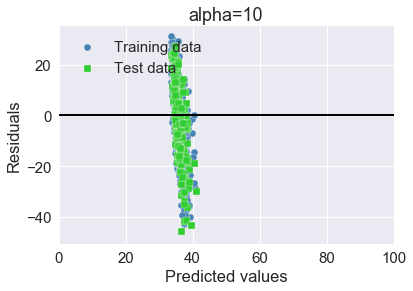

In [21]:
from sklearn.linear_model import Ridge
alpha=[0.01,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10]
score_train=[]
score_test=[]
coef=[]
intercept=[]
mse_train=[]
mse_test=[]
for i in alpha:
    ridge=Ridge(alpha=i,normalize=True).fit(X_train, y_train)#不归一化没效果
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    ## plot the residual errors
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('alpha='+str(i))
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=100, color='black', lw=2)
    plt.xlim([0,100])
    plt.show()
    
    ## calculate mse, need normalize
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    score_train.append(ridge.score(X_train, y_train))
    score_test.append(ridge.score(X_test, y_test))
    coef.append(ridge.coef_)
    intercept.append(ridge.intercept_)

In [22]:
#制表输出结果，最优为0.01
Ridge_result=pd.DataFrame([score_train,score_test,mse_train,mse_test,coef,intercept],
                        columns=alpha,
                        index=['R^2_train','R^2_test','mse_train','mse_test',
                               'coef','intercept'])

In [23]:
Ridge_result.iloc[0:4]#输出train&test

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,5.0,10.0
R^2_train,0.615967,0.607752,0.59833,0.579848,0.561185,0.542629,0.52448,0.506933,0.490101,0.474036,0.458753,0.444242,0.334389,0.189066,0.109169
R^2_test,0.609498,0.606419,0.600807,0.587123,0.571333,0.554575,0.53756,0.520713,0.504287,0.488427,0.473208,0.458661,0.3467,0.196368,0.11334
mse_train,106.364,108.639,111.249,116.368,121.537,126.676,131.703,136.562,141.224,145.674,149.907,153.926,184.351,224.601,246.729
mse_test,111.738,112.619,114.225,118.14,122.658,127.453,132.322,137.143,141.843,146.381,150.736,154.898,186.934,229.95,253.708


In [24]:
for i in range(len(alpha)):
    print('When alpha=',alpha[i],'\nSlope:')
    print(Ridge_result.iloc[4,i])
    print('Intercept:\n%.3f'%slr.intercept_,'\n')

When alpha= 0.01 
Slope:
[ 0.109  0.089  0.071 -0.188  0.291  0.007  0.006  0.113]
Intercept:
-30.959 

When alpha= 0.05 
Slope:
[ 0.085  0.061  0.037 -0.237  0.35  -0.01  -0.017  0.106]
Intercept:
-30.959 

When alpha= 0.1 
Slope:
[ 0.073  0.048  0.021 -0.235  0.411 -0.015 -0.024  0.099]
Intercept:
-30.959 

When alpha= 0.2 
Slope:
[ 0.062  0.037  0.008 -0.211  0.47  -0.017 -0.026  0.088]
Intercept:
-30.959 

When alpha= 0.3 
Slope:
[ 0.056  0.031  0.002 -0.189  0.487 -0.017 -0.026  0.08 ]
Intercept:
-30.959 

When alpha= 0.4 
Slope:
[ 0.051  0.027 -0.001 -0.172  0.486 -0.016 -0.025  0.073]
Intercept:
-30.959 

When alpha= 0.5 
Slope:
[ 0.047  0.024 -0.003 -0.158  0.476 -0.016 -0.023  0.067]
Intercept:
-30.959 

When alpha= 0.6 
Slope:
[ 0.044  0.021 -0.005 -0.146  0.463 -0.015 -0.022  0.062]
Intercept:
-30.959 

When alpha= 0.7 
Slope:
[ 0.042  0.02  -0.006 -0.136  0.448 -0.015 -0.021  0.058]
Intercept:
-30.959 

When alpha= 0.8 
Slope:
[ 0.039  0.018 -0.006 -0.127  0.432 -0.014 -0.0

In [25]:
#Part 3.2: LASSO regression
#Fit a LASSO model using SKlearn to all of the features of the dataset.  
#Test several settings for alpha.  
#Describe the model (coefficients and y intercept), 
#plot the residual errors, 
#calculate performance metrics: MSE and R2.  
#Which alpha gives the best performing model?

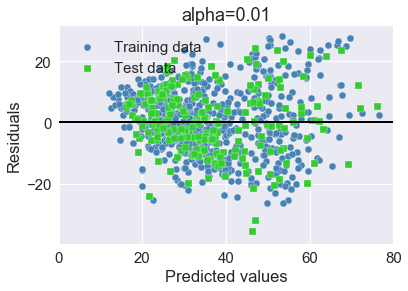

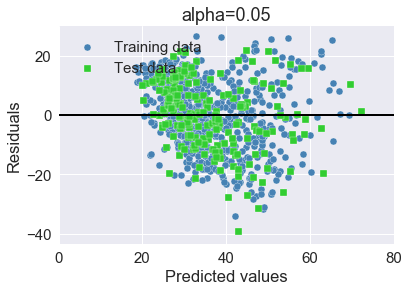

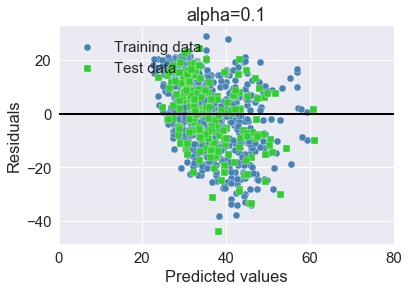

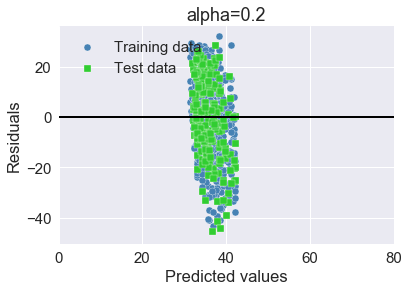

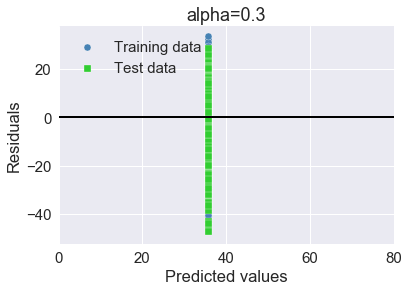

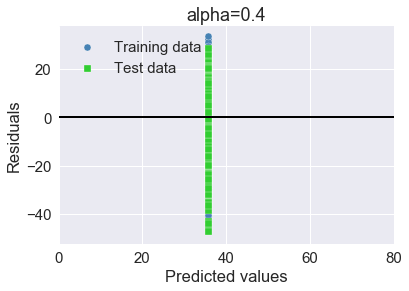

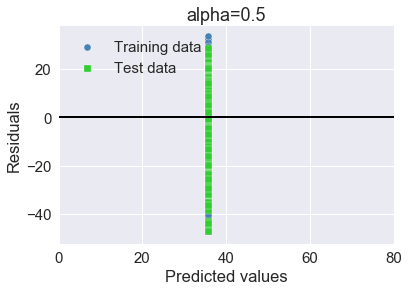

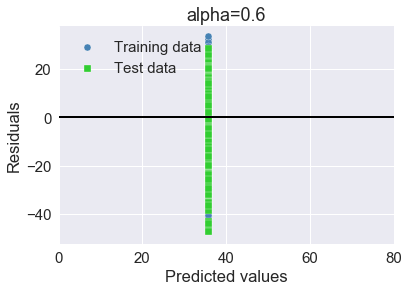

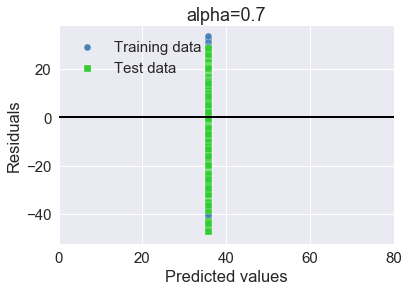

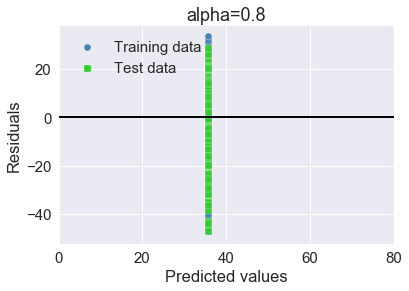

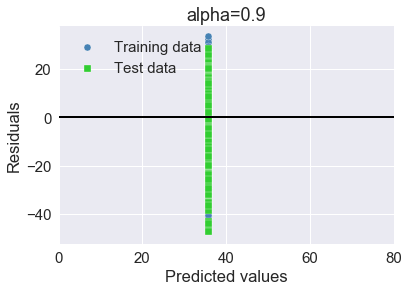

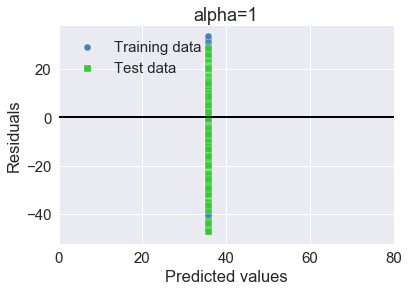

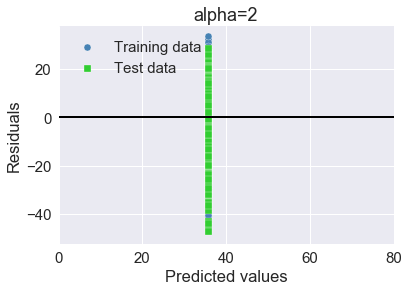

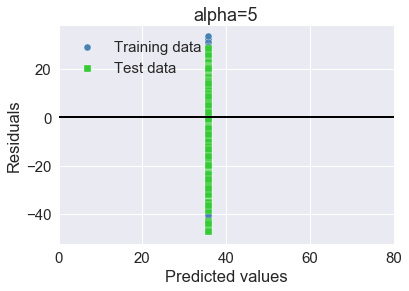

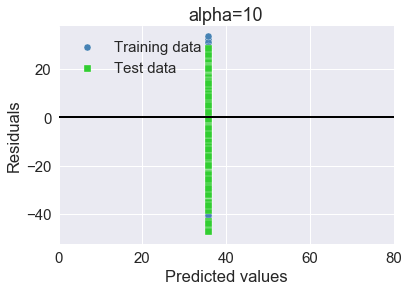

In [26]:
from sklearn.linear_model import Lasso
alpha=[0.01,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10]
score_train=[]
score_test=[]
coef=[]
intercept=[]
mse_train=[]
mse_test=[]
for i in alpha:
    lasso=Lasso(alpha=i,normalize=True).fit(X_train, y_train)#不归一化没效果
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    ## plot the residual errors
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('alpha='+str(i))
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=80, color='black', lw=2)
    plt.xlim([0,80])
    plt.show()
    
    ## calculate mse, need normalize
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    score_train.append(lasso.score(X_train, y_train))
    score_test.append(lasso.score(X_test, y_test))
    coef.append(lasso.coef_)
    intercept.append(lasso.intercept_)

In [27]:
Lasso_result=pd.DataFrame([score_train,score_test,mse_train,mse_test,coef,intercept],
                        columns=alpha,
                        index=['R^2_train','R^2_test','mse_train','mse_test',
                               'coef','intercept'])

In [36]:
Lasso_result.iloc[0:4].round(2)#输出train&test

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,5.0,10.0
R^2_train,0.61148,0.54186,0.414202,0.130137,0,0,0,0,0,0,0,0,0,0,0
R^2_test,0.607904,0.548518,0.425308,0.125839,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813,-0.000239813
mse_train,107.606,126.889,162.246,240.922,276.965,276.965,276.965,276.965,276.965,276.965,276.965,276.965,276.965,276.965,276.965
mse_test,112.194,129.186,164.441,250.131,286.207,286.207,286.207,286.207,286.207,286.207,286.207,286.207,286.207,286.207,286.207


In [29]:
for i in range(len(alpha)):
    print('When alpha=',alpha[i],'\nSlope:')
    print(Lasso_result.iloc[4,i])
    print('Intercept:\n%.3f'%slr.intercept_,'\n')

When alpha= 0.01 
Slope:
[ 0.097  0.075  0.052 -0.196  0.314 -0.    -0.     0.107]
Intercept:
-30.959 

When alpha= 0.05 
Slope:
[ 0.066  0.035  0.    -0.112  0.539 -0.    -0.     0.079]
Intercept:
-30.959 

When alpha= 0.1 
Slope:
[ 0.05   0.01  -0.    -0.024  0.47  -0.    -0.     0.046]
Intercept:
-30.959 

When alpha= 0.2 
Slope:
[ 0.025  0.    -0.    -0.     0.    -0.    -0.     0.   ]
Intercept:
-30.959 

When alpha= 0.3 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 0.4 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 0.5 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 0.6 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 0.7 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 0.8 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 0.9 
Slope:
[ 0.  0. -0. -0.  0. -0. -0.  0.]
Intercept:
-30.959 

When alpha= 1 
Slope:
[ 0.  0. -0

In [30]:
#Part 3.3: Elastic Net regression
#Fit an ElasticNet model using SKlearn to all of the features of the dataset.  
#Test several settings for l1_ratio.  
#Describe the model (coefficients and y intercept), 
#plot the residual errors, 
#calculate performance metrics: MSE and R2.  
#Which l1_ratio gives the best performing model?

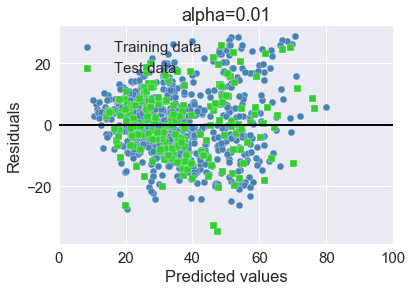

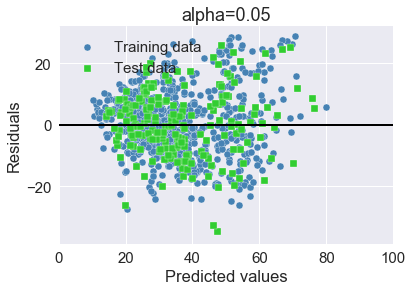

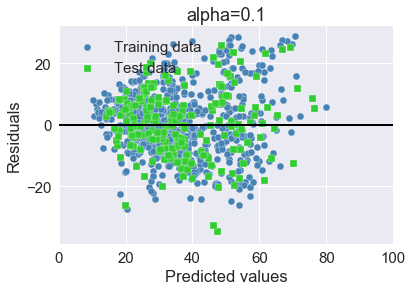

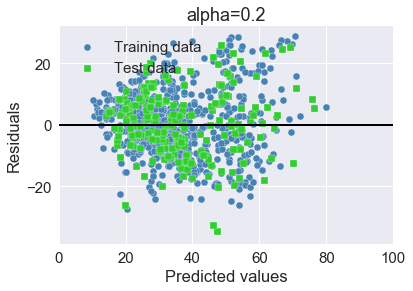

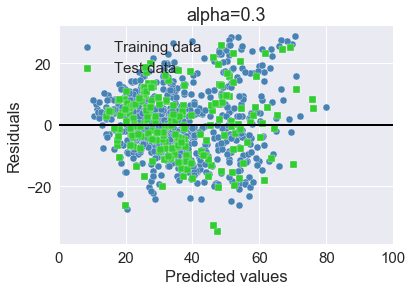

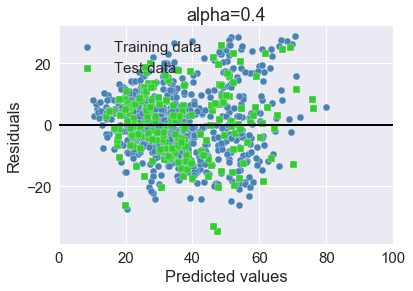

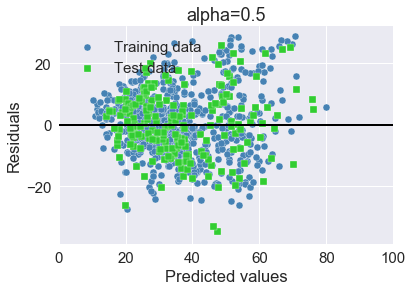

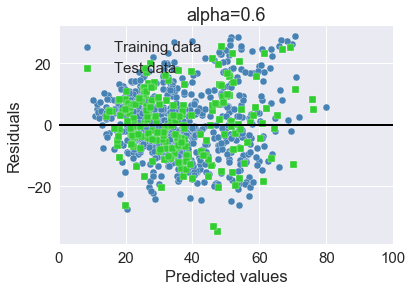

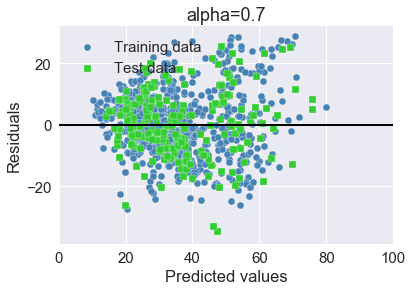

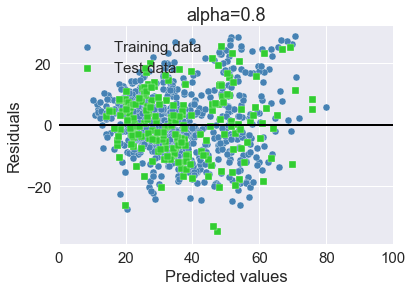

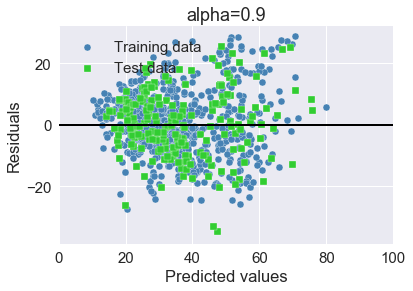

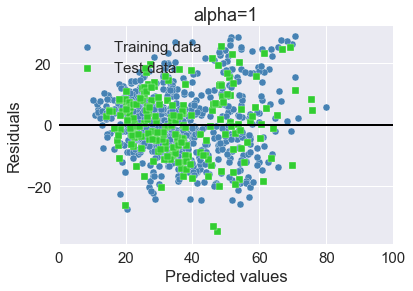

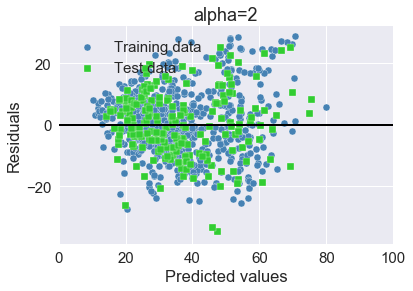

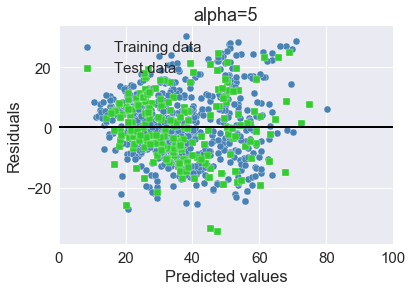

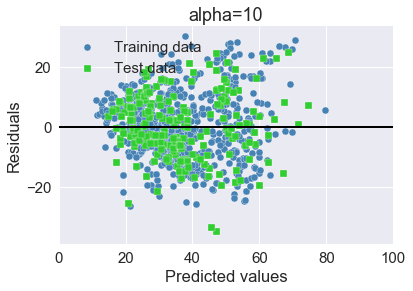

In [31]:
from sklearn.linear_model import ElasticNet
l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
score_train=[]
score_test=[]
coef=[]
intercept=[]
mse_train=[]
mse_test=[]
for i in alpha:
    elanet=ElasticNet(alpha=1.0, l1_ratio=i).fit(X_train, y_train)#不归一化没效果
    y_train_pred = elanet.predict(X_train)
    y_test_pred = elanet.predict(X_test)
    
    ## plot the residual errors
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('alpha='+str(i))
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=100, color='black', lw=2)
    plt.xlim([0,100])
    plt.show()
    
    ## calculate mse, need normalize
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    score_train.append(elanet.score(X_train, y_train))
    score_test.append(elanet.score(X_test, y_test))
    coef.append(elanet.coef_)
    intercept.append(elanet.intercept_)

In [32]:
Elanet_result=pd.DataFrame([score_train,score_test,mse_train,mse_test,coef,intercept],
                        columns=alpha,
                        index=['R^2_train','R^2_test','mse_train','mse_test',
                               'coef','intercept'])

In [33]:
Elanet_result.iloc[0:4]#输出train&test

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,5.0,10.0
R^2_train,0.617174,0.61717,0.617165,0.617154,0.61714,0.617123,0.617104,0.617082,0.617057,0.617028,0.616997,0.616962,0.616388,0.613104,0.612183
R^2_test,0.608041,0.608043,0.608045,0.608046,0.608044,0.608038,0.60803,0.608018,0.608002,0.607983,0.60796,0.607933,0.607395,0.604063,0.603662
mse_train,106.03,106.031,106.032,106.035,106.039,106.044,106.049,106.055,106.062,106.07,106.079,106.088,106.247,107.157,107.412
mse_test,112.154,112.154,112.153,112.153,112.154,112.155,112.158,112.161,112.166,112.171,112.178,112.185,112.34,113.293,113.408


In [34]:
for i in range(len(alpha)):
    print('When alpha=',alpha[i],'\nSlope:')
    print(Elanet_result.iloc[4,i])
    print('Intercept:\n%.3f'%slr.intercept_,'\n')

When alpha= 0.01 
Slope:
[ 0.123  0.106  0.093 -0.144  0.266  0.019  0.023  0.116]
Intercept:
-30.959 

When alpha= 0.05 
Slope:
[ 0.123  0.106  0.093 -0.145  0.264  0.019  0.023  0.116]
Intercept:
-30.959 

When alpha= 0.1 
Slope:
[ 0.123  0.106  0.093 -0.145  0.262  0.019  0.023  0.116]
Intercept:
-30.959 

When alpha= 0.2 
Slope:
[ 0.123  0.106  0.093 -0.147  0.257  0.019  0.022  0.116]
Intercept:
-30.959 

When alpha= 0.3 
Slope:
[ 0.123  0.106  0.092 -0.148  0.252  0.019  0.022  0.116]
Intercept:
-30.959 

When alpha= 0.4 
Slope:
[ 0.123  0.105  0.092 -0.15   0.248  0.018  0.022  0.116]
Intercept:
-30.959 

When alpha= 0.5 
Slope:
[ 0.123  0.105  0.092 -0.151  0.243  0.018  0.022  0.116]
Intercept:
-30.959 

When alpha= 0.6 
Slope:
[ 0.122  0.105  0.092 -0.153  0.238  0.018  0.021  0.116]
Intercept:
-30.959 

When alpha= 0.7 
Slope:
[ 0.122  0.105  0.092 -0.154  0.232  0.017  0.021  0.115]
Intercept:
-30.959 

When alpha= 0.8 
Slope:
[ 0.122  0.105  0.092 -0.156  0.227  0.017  0.0